# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Dyah Putriana Savitri]
- **Email:** [dyahana1997@gmail.coml]
- **ID Dicoding:** [dyahsavv]

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca mempengaruhi penyewaan sepeda?
- Bagaimana perbandingan penyewaan setiap bulannya?
- Bagaimana perbedaan penyewaan pada holiday dan workingday?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### Gathering Data

Membuat tabel day_df yang diimpor dari dataset day.csv

In [3]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat tabel hour_df yang diimpor dari dataset hour.csv

In [5]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [6]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mendapatkan tabel day_df
- Mendapatkan tabel hour_df

### Assessing Data

Assesing data day_df

1. Mengidentifikasi data pada setiap kolomnya day_df

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tipe data dteday masih berupa object, mungkin akan lebih baik jika diubah ke datetime

2. Memeriksa apakah terdapat missing value di day_df

In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Aman tidak terdapat missing value pada dataset day_df

3. Cek apakah ada duplikasi data

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Aman, tidak terdapat duplikasi data

4. Cek ringkasan parameter statistik

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assesing Data hour_df

1. Mengidentifikasi data pada setiap kolomnya hour_d

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti dataset day_df untuk tipe data dari dteday masih object dan perlu digantik ke date time

2. Memeriksa apakah terdapat missing value di day_df

In [12]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Aman, dataset hour_df tidak memiliki missing value

3. Cek apakah ada duplikasi data

In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Disini juga tidak terdapat duplikasi

4. Cek ringkasan parameter statistik

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua data tidak memiliki missing value
- Kedua data tidak memiliki duplicate data

### Cleaning Data

1. Memperbaiki tipe data pada day_df

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

2. Memperbaiki tipe data pada hour_df

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

3. Mengganti beberapa nama kolom pada day_dfagar mudah dibaca

In [19]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_sit',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_sit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


4. Mengubah beberapa nama kolom pada hour_df, agar mudah dibaca

In [20]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_sit',
    'cnt': 'count'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_sit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengganti beberapa nama kolom agar mudah dibaca
- Mengganti tipe data object ke datetime

## Exploratory Data Analysis (EDA)

### Explore ...

Melihat isi secara keseluruhan

In [21]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_sit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Mengelompokan sesuai dengan weather_sit

In [22]:
day_df.groupby(by="weather_sit").agg({
    "instant": "nunique",
    "weather_sit": ["max", "min", "mean", "std"]
})

instant weather_sit              
            nunique         max min mean  std
weather_sit                                  
1               463           1   1  1.0  0.0
2               247           2   2  2.0  0.0
3                21           3   3  3.0  0.0

Dapat dilihat dari tabel diatas bahwa keadaan cuaca akan berpengaruh terhadap banyaknya sewa yang masuk.

Melihat banyaknya penyewa perbulannya

In [23]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
1      4521   431  2176.338710  134933
2      5062  1005  2655.298246  151352
3      8362   605  3692.258065  228920
4      7460   795  4484.900000  269094
5      8294  2633  5349.774194  331686
6      8120  3767  5772.366667  346342
7      8173  3285  5563.677419  344948
8      7865  1115  5664.419355  351194
9      8714  1842  5766.516667  345991
10     8156    22  5199.225806  322352
11     6852  1495  4247.183333  254831
12     6606   441  3403.806452  211036

Cukup merata ya, namun penyewaan tertinggi berada di bulan Agustus dan terendah pada bulan Januari

Melihat banyak penyewa saat holiday

In [24]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

Ternyata saat holiday justru sedikit orang yang melakukan penyewaan, maka kemungkinan para penyewa menggunakan sepeda sebagai daily use entah orang dewasa yang digunakan untuk bekerja, atau remaja untuk sekolah.

Melihat penyewa saat workingday

In [25]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

Penyewaan sepeda lebih tinggi ketika working day, dengan kemungkinan digunakan sebagai daily use untuk transportasi.

**Insight:**
- Kondisi cuaca mempengaruhi minat penyewa
- Saat holiday justru sepi peminat
- Sudah memiliki pelanggan yang setia

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-26-97d7f1b65886>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-97d7f1b65886>:11: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

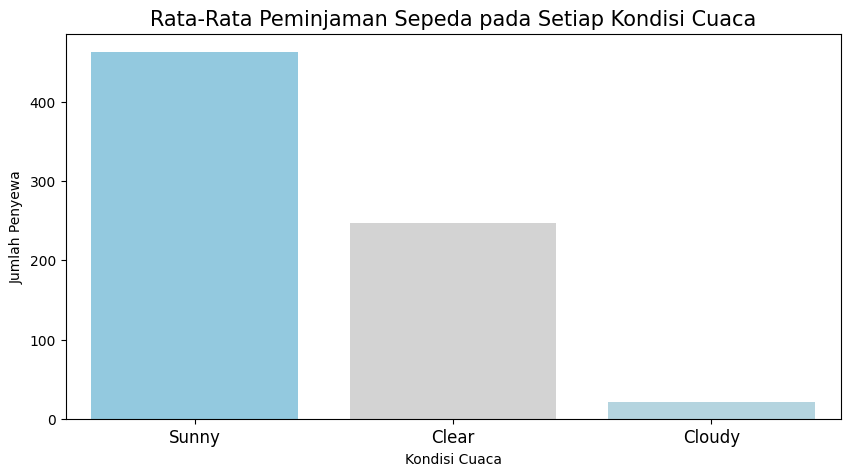

In [26]:
byweather_sit_df = day_df.groupby(by="weather_sit").instant.nunique().reset_index(name='count')

byweather_sit_df = day_df.groupby(by="weather_sit").instant.nunique().reset_index(name='count')
weather_situation = {1: 'Sunny', 2: 'Clear', 3: 'Cloudy', 4: 'Rain'}
byweather_sit_df['weather_situation'] = byweather_sit_df['weather_sit'].map(weather_situation)

plt.figure(figsize=(10, 5))

colors_ = ["#87CEEB", "#D3D3D3", "#ADD8E6", "#4682B4"]

sns.barplot(
    y="count",
    x="weather_situation",
    data=byweather_sit_df.sort_values(by="weather_sit", ascending=True),
     palette=colors_
)
plt.title("Rata-Rata Peminjaman Sepeda pada Setiap Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Kondisi Cuaca")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

<ipython-input-27-0552de8d81a9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-27-0552de8d81a9>:11: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = groupe

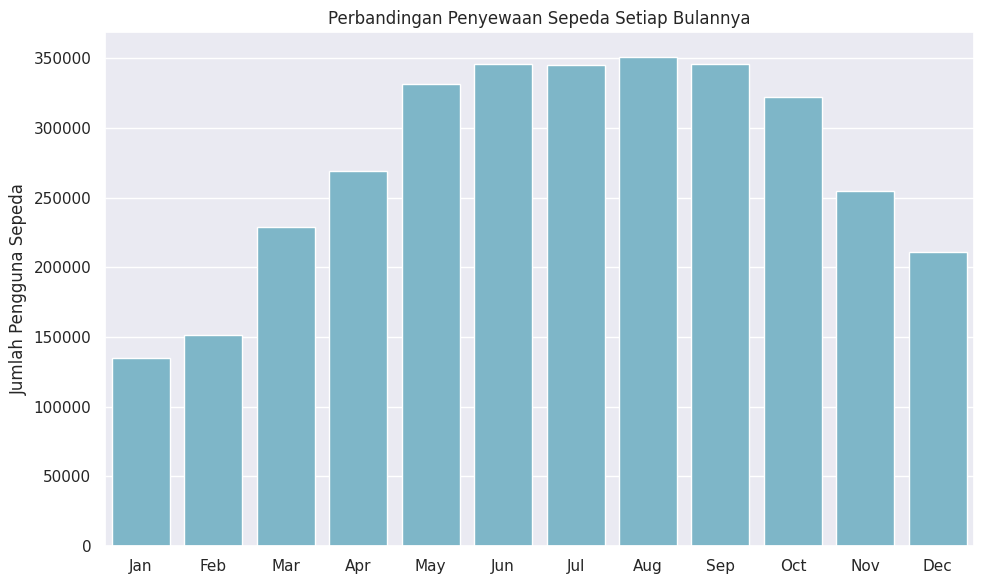

In [27]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_df['month_name'] = day_df['month'].apply(lambda x: month_names[x - 1])

monthly_counts = day_df.groupby('month_name')['count'].sum().reset_index()
monthly_counts = monthly_counts.sort_values(by='month_name', key=lambda x: pd.Categorical(x, categories=month_names, ordered=True))

color_ = ["#72BCD4"]

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(
    x='month_name',
    y='count',
    data=monthly_counts,
    palette=color_
)

plt.title('Perbandingan Penyewaan Sepeda Setiap Bulannya')
plt.xlabel('')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.tight_layout()
plt.show()

**Insight:**
- Kondisi cuaca berpengaruh dalam minat pengguna
- Sewa cukup stabil

In [28]:
day_df.to_csv("day.csv", index=False)

Untuk menyimpan berkas data yang telah dibersihkan

## Conclusion

- Conclution pertanyaan 1:
  Dari visualisasi diagram diatas dapan disimpulkan bahwasannya keadaan/ kondisi cuaca sangat berpengaruh terhadap banyaknya sewa yang masuk, jumlah sewa yang masuk akan meningkat ketika cuaca sedang bagus bagusnya untuk bersepeda, umumnya ketika cuaca sedang terik ataupun cerah, dan sewa akan menurun ketika kondisi cuaca mendung atau hujan, bahkan ketika hujan tidak ada satupun sewa yang masuk.
- Conclution pertanyaan 2:
  Dari diagram tersebut dapat kita lihat bahwasannya bisnis sewa sepeda ini sudah cukup mapan, dalam artian untuk sewa perbulannya itu cukup stabil, dengan sewa tertinggi berada di bulan agustus, dan terendah berada dibulan januari, dari sini pun bisa kita ambil kesimpulan bahwa bulan januari identik dengan musim dingin dengan cuaca yang sudah pasti cukup ekstrim bisa bersalju ataupun hujan yang membuat minat sewa menjadi turun, dan untuk bulan agustus identik dengan musim panas yang sudah pasti minat pengguna akan meningkat di musim panas karna cuacanya yang mendukung.
- Conclusion pertanyaan 3:
  Dari data yang sudah diolah bisa kita lihat bahwasannya sewa pada workingday lebih tinggi dibandingkan dengan sewa holidya, bisa kita prediksi bahwa sepeda kemungkinan besar digunakan sebagai alat transportasi untuk seseorang pergi ke kantor atau ke sekolah yang artinya dari sini pun kita bisa membuat package untuk anak sekolah atau orang kerja mungkin? agar dapat menarik minat pengguna.